## This script contains the following points:

### Importing Data & visualization Libraries
### The Elbow Technique
### K-Means Clustering

## Importing Data & visualization Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [24]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [36]:
# assigning path
path=r'C:/Users/Gal-E/CF Data Analysis/Achievement 6'

# import "immodata_sqm2.pkl" dataframe from "Prepared Data" folder
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_sqm2.pkl'))

In [37]:
df.shape

(184945, 21)

In [38]:
df.head()

bundesland                 city                      district  \
0  Nordrhein-Westfalen             Dortmund                      SchÃ¼ren   
1              Sachsen              Dresden  Ã„uÃŸere_Neustadt_Antonstadt   
2               Bremen               Bremen             Neu_Schwachhausen   
3              Sachsen  Mittelsachsen_Kreis                      Freiberg   
5   Baden-WÃ¼rttemberg    Emmendingen_Kreis                    Denzlingen   

                        street  zip_code  has_kitchen  balcony   lift  garden  \
0   Sch&uuml;ruferstra&szlig;e     44269        False    False  False    True   
1                    Turnerweg      1097        False     True   True   False   
2  Hermann-Henrich-Meier-Allee     28213        False     True  False   False   
3                   Am Bahnhof      9599        False    False  False    True   
5               no_information     79211         True    False  False   False   

   floor  ... telekom_uploadspeed  firing_type  \
0      1  ...           10.000000          oil   
1      3  ...            2.400391          NaN   
2      1  ...                 NaN          gas   
3      1  ...            2.400391          NaN   
5      2  ...           40.000000          oil   

                     heating_type number_of_rooms  square_meter  base_rent  \
0                 central_heating               4            86        595   
1                   floor_heating               3            84        965   
2  self_contained_central_heating               3            85        765   
3  self_contained_central_heating               2            62        310   
5                     oil_heating               2            53        580   

   total_rent  service_charge  immoscout_id price_per_m2  
0         840             245      96107057     6.917969  
1        1300             255     113147523    11.484375  
2         903             138     114751222     9.000000  
3         380              70     114391930     5.000000  
5         690             110     106416361    10.945312  

[5 rows x 21 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184945 entries, 0 to 228331
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   bundesland           184945 non-null  object  
 1   city                 184945 non-null  object  
 2   district             184945 non-null  object  
 3   street               184945 non-null  object  
 4   zip_code             184945 non-null  int32   
 5   has_kitchen          184945 non-null  bool    
 6   balcony              184945 non-null  bool    
 7   lift                 184945 non-null  bool    
 8   garden               184945 non-null  bool    
 9   floor                184945 non-null  int16   
 10  flat_type            160162 non-null  category
 11  telekom_uploadspeed  162965 non-null  float16 
 12  firing_type          149227 non-null  category
 13  heating_type         159305 non-null  category
 14  number_of_rooms      184945 non-null  int16   
 15  squar

In [40]:
# Dropping not numerical columns
df=df.drop(columns = ['bundesland','city', 'street', 'district','has_kitchen','lift','balcony','garden','flat_type', 'telekom_uploadspeed', 'firing_type','heating_type', 'immoscout_id'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184945 entries, 0 to 228331
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   zip_code         184945 non-null  int32  
 1   floor            184945 non-null  int16  
 2   number_of_rooms  184945 non-null  int16  
 3   square_meter     184945 non-null  int16  
 4   base_rent        184945 non-null  int16  
 5   total_rent       184945 non-null  int16  
 6   service_charge   184945 non-null  int16  
 7   price_per_m2     184945 non-null  float16
dtypes: float16(1), int16(6), int32(1)
memory usage: 4.6 MB


In [42]:
df.describe()

C:\Users\Gal-E\Anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\Gal-E\Anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Gal-E\Anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\Gal-E\Anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


zip_code          floor  number_of_rooms   square_meter  \
count  184945.000000  184945.000000    184945.000000  184945.000000   
mean    35730.141815       2.108481         2.669123      72.722961   
std     27807.650989       1.666941         0.981065      30.356428   
min       852.000000      -1.000000         1.000000      11.000000   
25%      9113.000000       1.000000         2.000000      54.000000   
50%     36396.000000       2.000000         3.000000      67.000000   
75%     53902.000000       3.000000         3.000000      85.000000   
max     99994.000000      45.000000        16.000000     649.000000   

           base_rent     total_rent  service_charge   price_per_m2  
count  184945.000000  184945.000000   184945.000000  184945.000000  
mean      637.330077     809.390781      150.008365            NaN  
std       479.024650     538.287539       86.018449       0.000000  
min       151.000000     160.000000        0.000000       0.801270  
25%       333.000000     470.000000       95.000000       5.554688  
50%       480.000000     643.000000      135.000000       7.257812  
75%       790.000000     978.000000      189.000000      10.101562  
max      8700.000000    9000.000000     6045.000000      97.062500

In [43]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

zip_code           0
floor              0
number_of_rooms    0
square_meter       0
base_rent          0
total_rent         0
service_charge     0
price_per_m2       0
dtype: int64

## Elbow technique

In [44]:
num_cl = range(1, 10)                               # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl]     # Defines k-means clusters in the range assigned above.

In [45]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]        # Creates a score that represents

# a rate of variation for the given cluster option.
score

C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\clust

[-143108376174852.44,
 -38196252781183.6,
 -13293505852467.553,
 -7860355008733.355,
 -4631614526350.167,
 -3590977451635.0225,
 -2724422188992.275,
 -2118988440621.6697,
 -1659207846820.888]

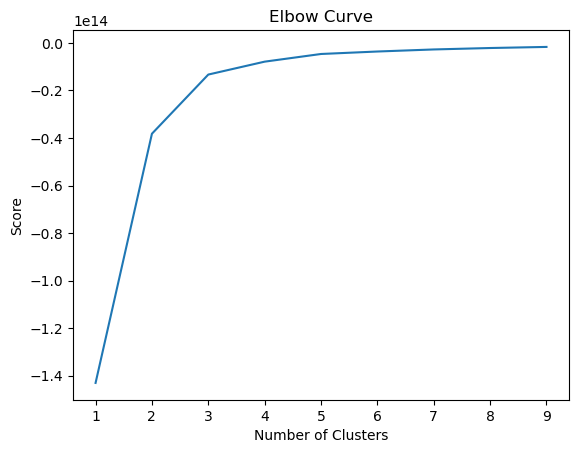

In [46]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

in the curve above we can clearly see that after 3 the line straightens out. We chose 3 as our clusters. 

## K-Means clustering

In [47]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [48]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [49]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Gal-E\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
df.head()

zip_code  floor  number_of_rooms  square_meter  base_rent  total_rent  \
0     44269      1                4            86        595         840   
1      1097      3                3            84        965        1300   
2     28213      1                3            85        765         903   
3      9599      1                2            62        310         380   
5     79211      2                2            53        580         690   

   service_charge  price_per_m2  clusters  
0             245      6.917969         2  
1             255     11.484375         0  
2             138      9.000000         2  
3              70      5.000000         0  
5             110     10.945312         1

In [51]:
df['clusters'].value_counts()

clusters
0    81912
2    67811
1    35222
Name: count, dtype: int64

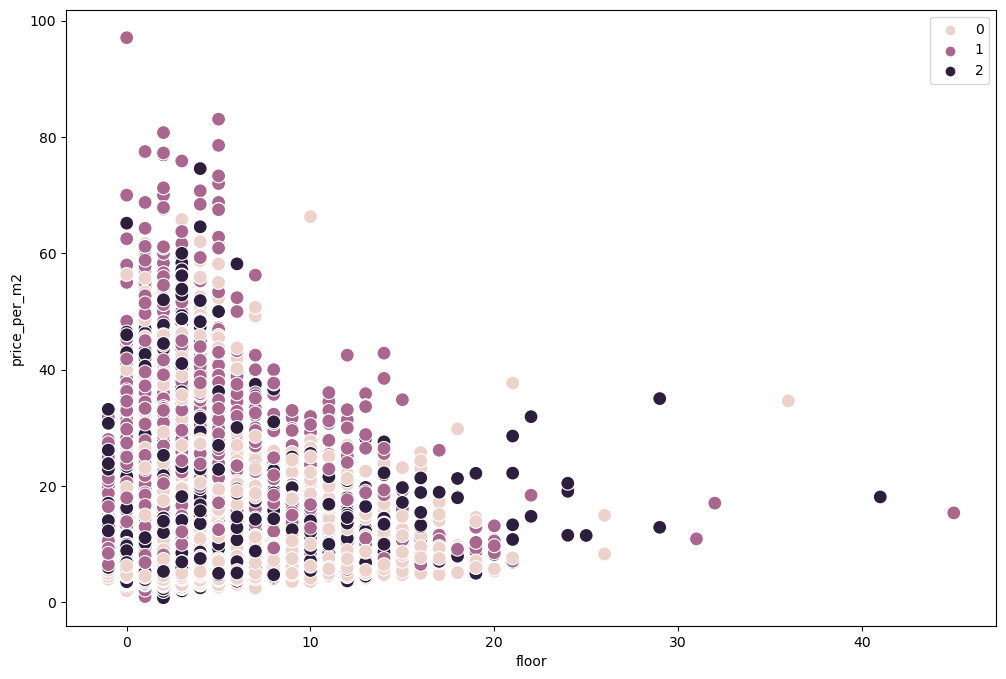

In [53]:
# Plotting the clusters for the "floor" and "price_per_m2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['floor'], y=df['price_per_m2'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)                    # This removes the grid from the background.
plt.xlabel('floor')        # Label x-axis.
plt.ylabel('price_per_m2')          # Label y-axis.
plt.show()

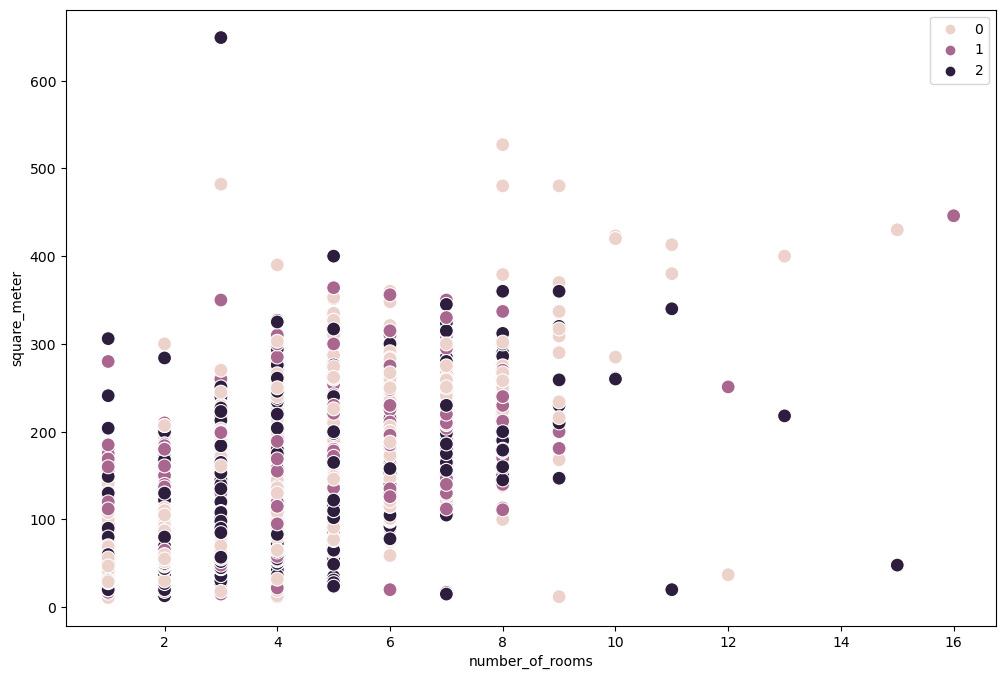

In [54]:
# Plotting the clusters for the "number_of_rooms" and "square_meter" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_rooms'], y=df['square_meter'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)                    # This removes the grid from the background.
plt.xlabel('number_of_rooms')        # Label x-axis.
plt.ylabel('square_meter')          # Label y-axis.
plt.show()

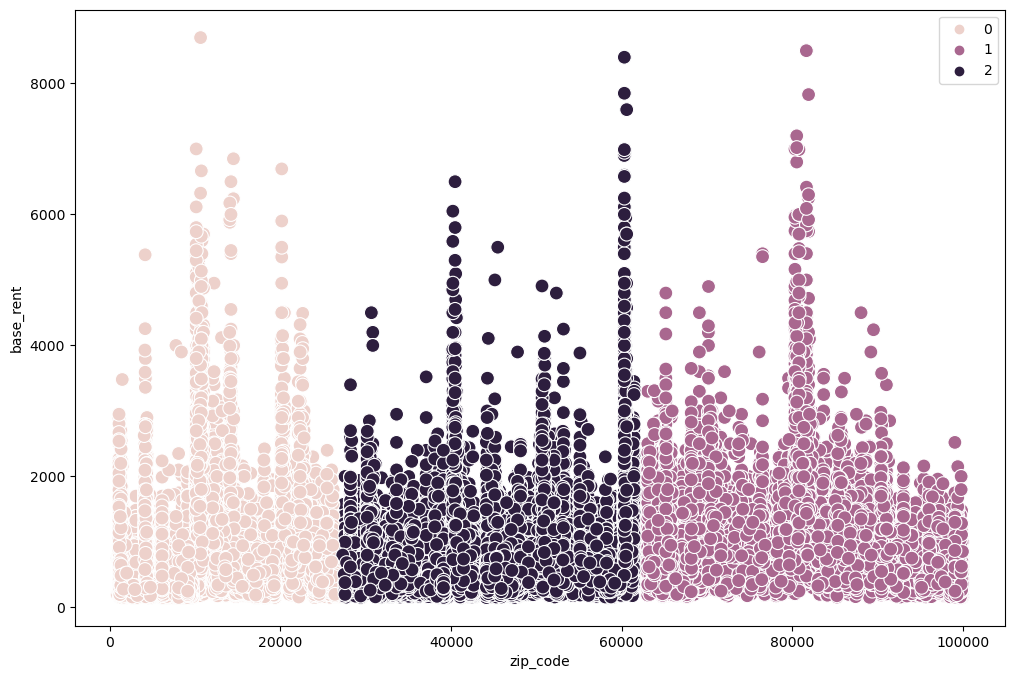

In [55]:
# Plotting the clusters for the "zip_code" and "base_rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['zip_code'], y=df['base_rent'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)                    # This removes the grid from the background.
plt.xlabel('zip_code')        # Label x-axis.
plt.ylabel('base_rent')          # Label y-axis.
plt.show()

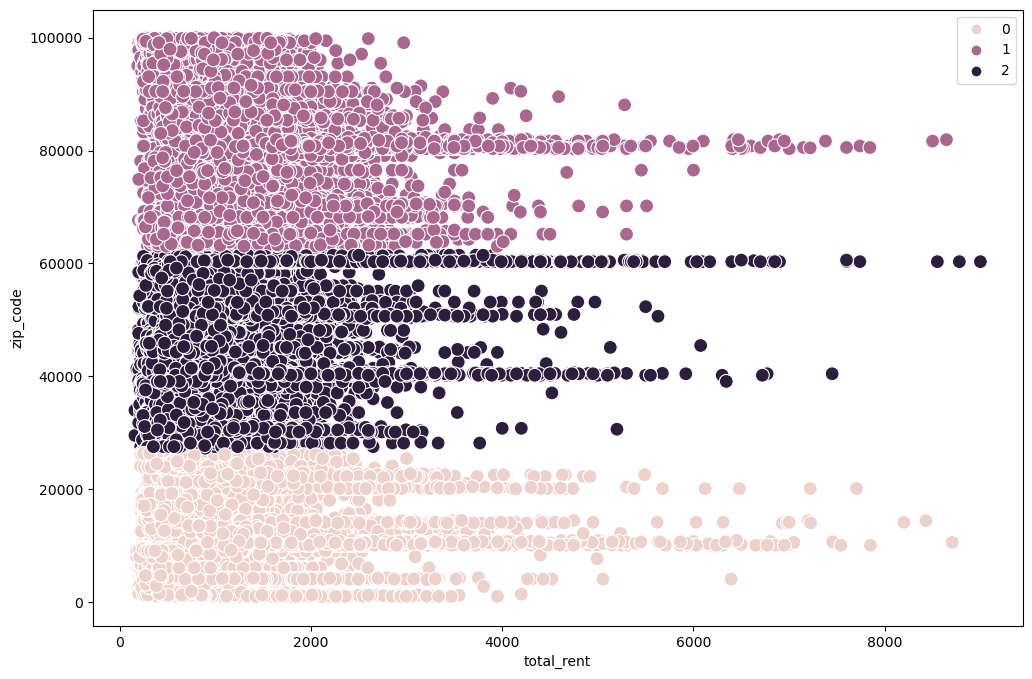

In [57]:
# Plotting the clusters for the "total_rent" and "zip_code" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_rent'], y=df['zip_code'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)                    # This removes the grid from the background.
plt.xlabel('total_rent')        # Label x-axis.
plt.ylabel('zip_code')          # Label y-axis.
plt.show()

### from the created clusters "floor and price_per_m2" & "number_of_rooms and square_meter" it is hard to recognize any useful insights
### however from the "total_rent and zip_code" we can see that our algorithm grouped the listings through their zip codes in 3 groups.
### and wee see some zip codes contains wide variaty of rental prices and most expansive rental objects 

In [58]:
# renaming the clusters 
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [59]:
df.groupby('cluster').agg({'square_meter':['mean', 'median'], 
                            'floor':['mean', 'median'], 
                            'base_rent':['mean', 'median'],
                            'total_rent':['mean', 'median'],
                            'price_per_m2':['mean', 'median']})

square_meter            floor          base_rent         \
                    mean median      mean median        mean median   
cluster                                                               
dark purple    74.159856   70.0  1.946956    2.0  618.636386  493.0   
pink           68.462887   62.0  2.306927    2.0  535.907327  379.0   
purple         79.863778   76.0  1.957952    2.0  909.187951  790.0   

              total_rent        price_per_m2             
                    mean median         mean     median  
cluster                                                  
dark purple   797.006031  660.0     8.321637   7.226562  
pink          698.754859  525.0     7.555201   6.105469  
purple       1090.528477  965.0    11.978744  10.320312

- all three groups are pretty similar. Purple /cluster 1/ is slightly better in all variables
- Further exploration is needed to get more useful insights. It would be helpful if the clusters were made in price range. not in a zip code range. then maybe we can compare them easily.

other categorical variables in our data could give us more insights for the price trend about what could be the factors for higher price except the square meter and location